In [3]:
working_dir = "/data/projects/dschaub/ANCA-GN_transcriptomics"
data_dir = "data/single-cell/exploratory/alignment"
save_dir = "data/single-cell/exploratory/prefiltering_objects"

In [4]:
setwd(working_dir)

library(Seurat)
library(dplyr)
#library(tidyverse)
library(here)
#library(readxl)
#library(future)
#library(Matrix)
library(Signac)
library(ggplot2)
library(IMSBSeuratHelpers)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


here() starts at /data/projects/dschaub/ANCA-GN_transcriptomics



In [5]:
sample_ID<-"E008B"

In [6]:
path = file.path(data_dir, sample_ID)
print(path)

seu.data <- Read10X(data.dir = path)
dim(seu.data)

[1] "data/single-cell/exploratory/alignment/E008B"


[1] 33538  1406

In [7]:
seu <- CreateSeuratObject(counts = seu.data,
                          min.cells = 0, 
                          min.features = 0, project=sample_ID)
seu

An object of class Seurat 
33538 features across 1406 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

In [8]:
seu <- count_fractions(seu,species = "human")

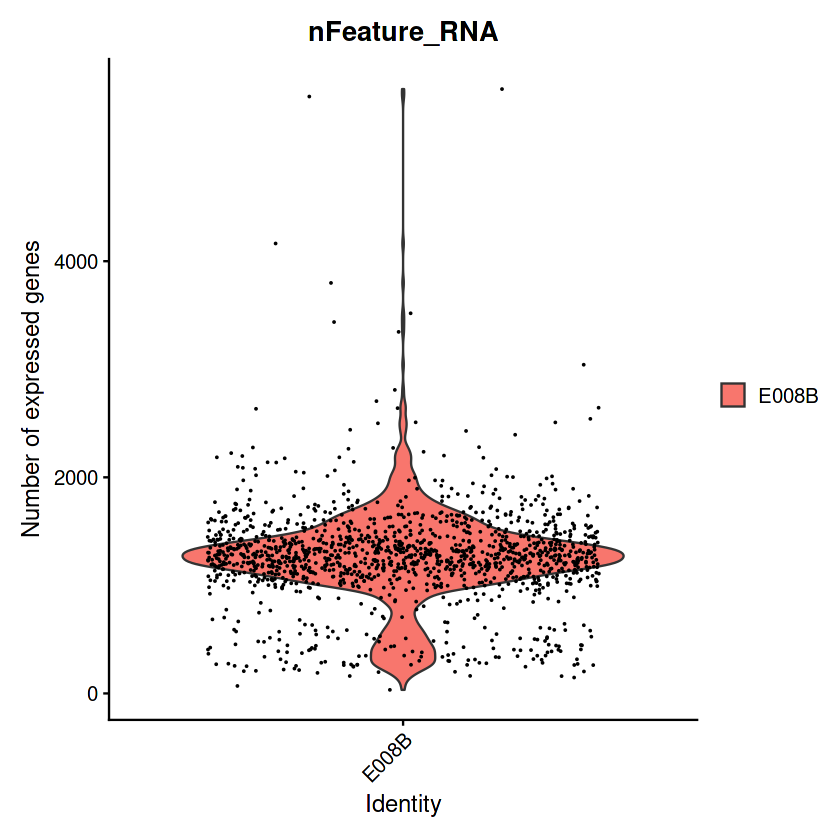

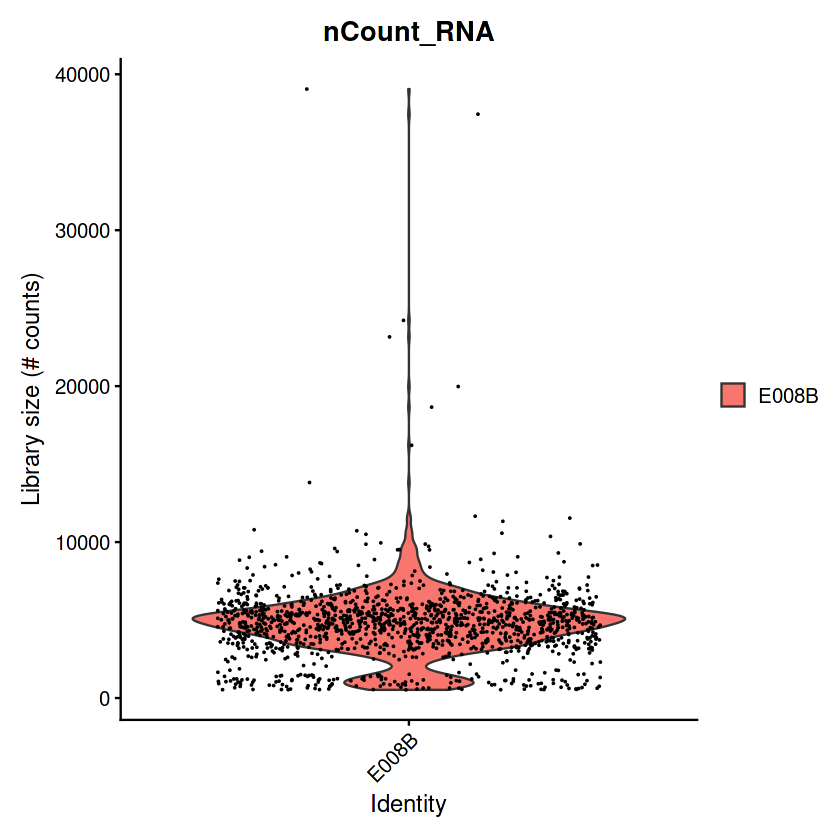

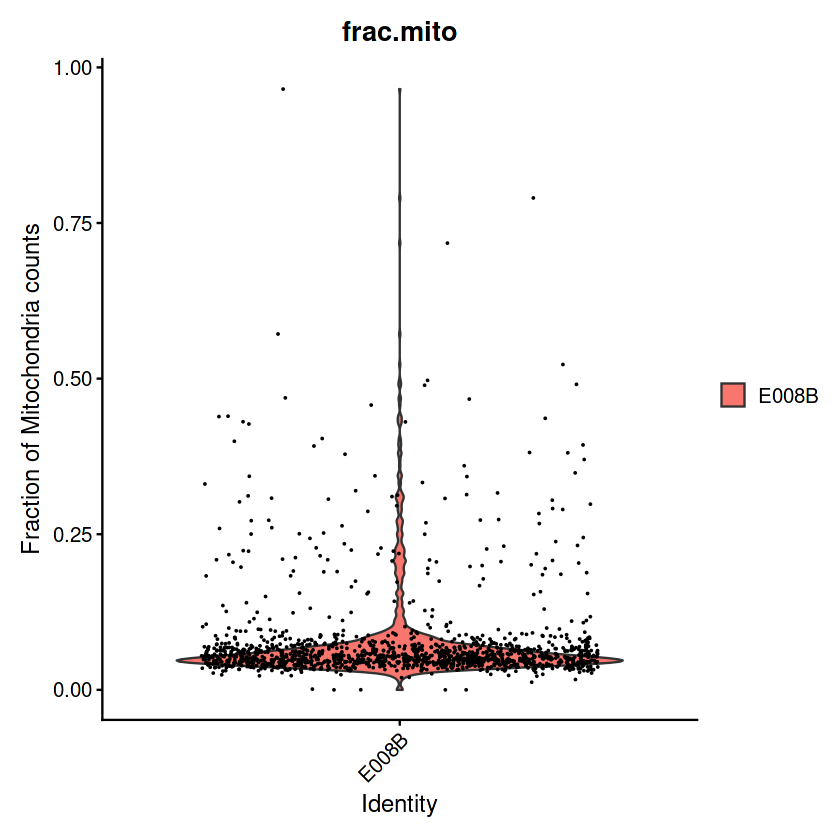

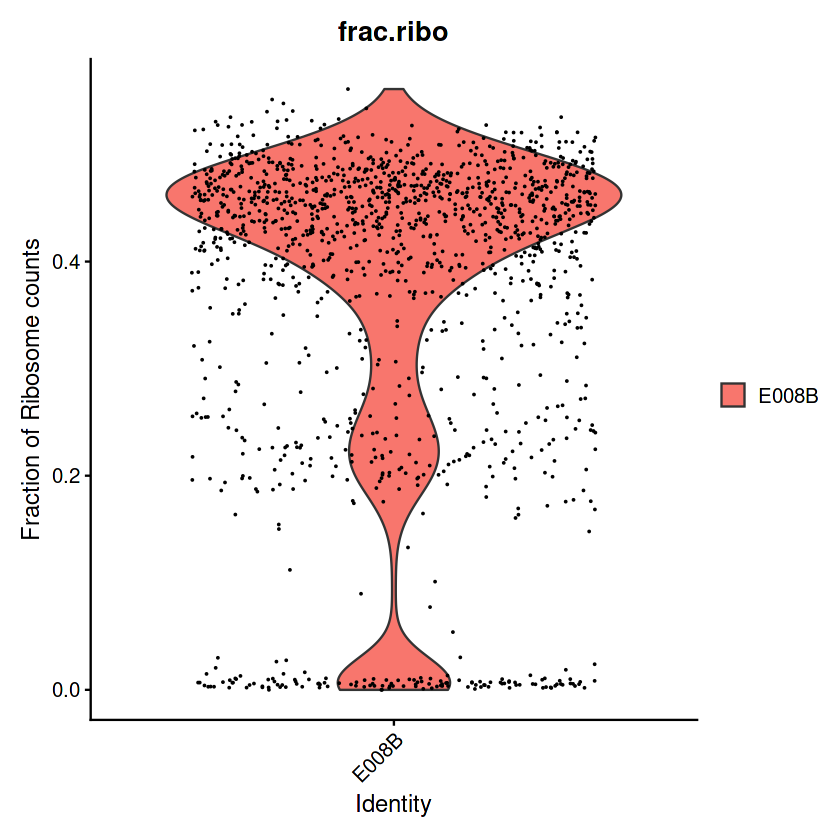

$number_of_genes

$number_of_counts

$frac.mito

$frac.ribo

$num_counts_vs_frac.mito

$num_counts_vs_num_genes


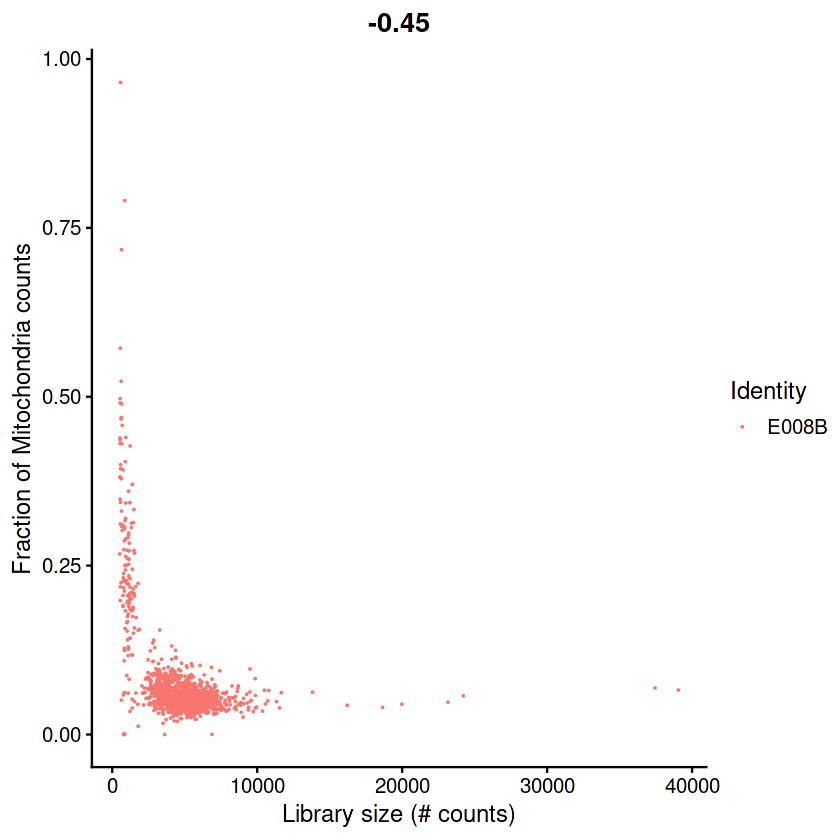

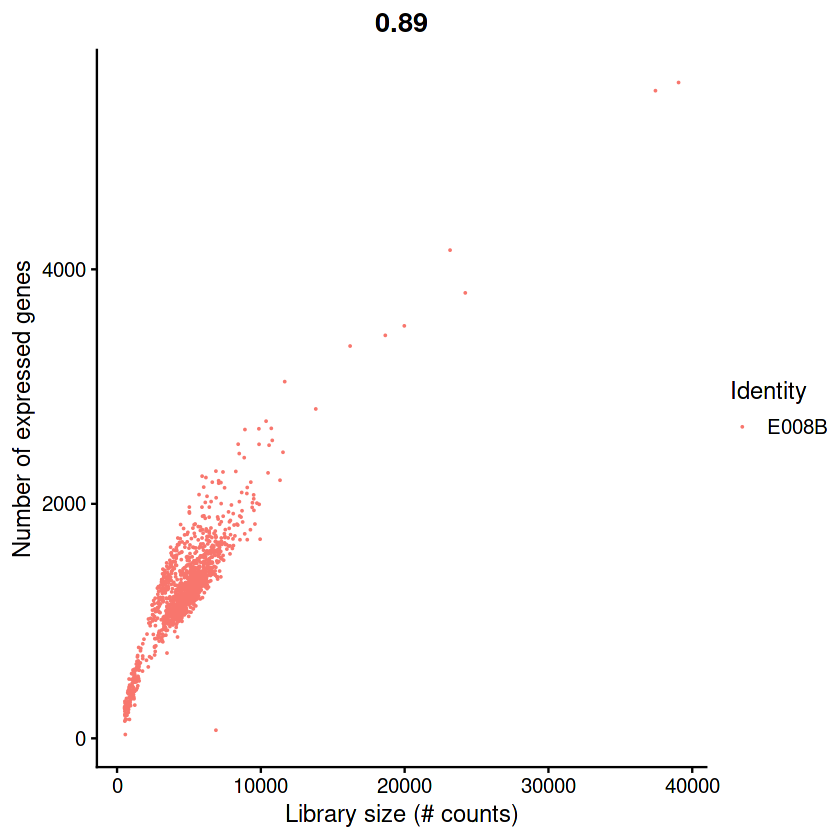

In [9]:
#qc plot before filtering
suppressWarnings(plt<-plot_mito_ribo(seu))
plt

In [10]:
seu@meta.data$Feature_Count_ratio<-
seu@meta.data$nFeature_RNA/seu@meta.data$nCount_RNA
head(seu@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,frac.mito,frac.ribo,Feature_Count_ratio
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
AAACGAAAGGCAGGTT-1,E008B,6828,1561,0.06077914,0.4455185,0.2286175
AAAGAACCAACCAACT-1,E008B,3772,1346,0.06654295,0.2492047,0.3568399
AAAGGATGTGGGTCAA-1,E008B,6942,1378,0.04364736,0.5430712,0.1985019
AAAGGATTCGATCCAA-1,E008B,7166,1653,0.05316774,0.4586938,0.2306726
AAAGGGCAGTCATGCT-1,E008B,5034,1289,0.04628526,0.4423917,0.2560588
AAAGGGCCACTCCTTG-1,E008B,2880,1294,0.03541667,0.1875000,0.4493056


In [11]:
#filtering cells
frac_mito_threshold <- 0.1
min_num_genes <- 500
max_num_genes <- 5000
#Feature_Count_ratio_threshold<-3000/10000
seu <- subset(seu,
             frac.mito < frac_mito_threshold &
             nFeature_RNA > min_num_genes &
             nFeature_RNA < max_num_genes #&
             #Feature_Count_ratio > Feature_Count_ratio_threshold
             )
seu

An object of class Seurat 
33538 features across 1247 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

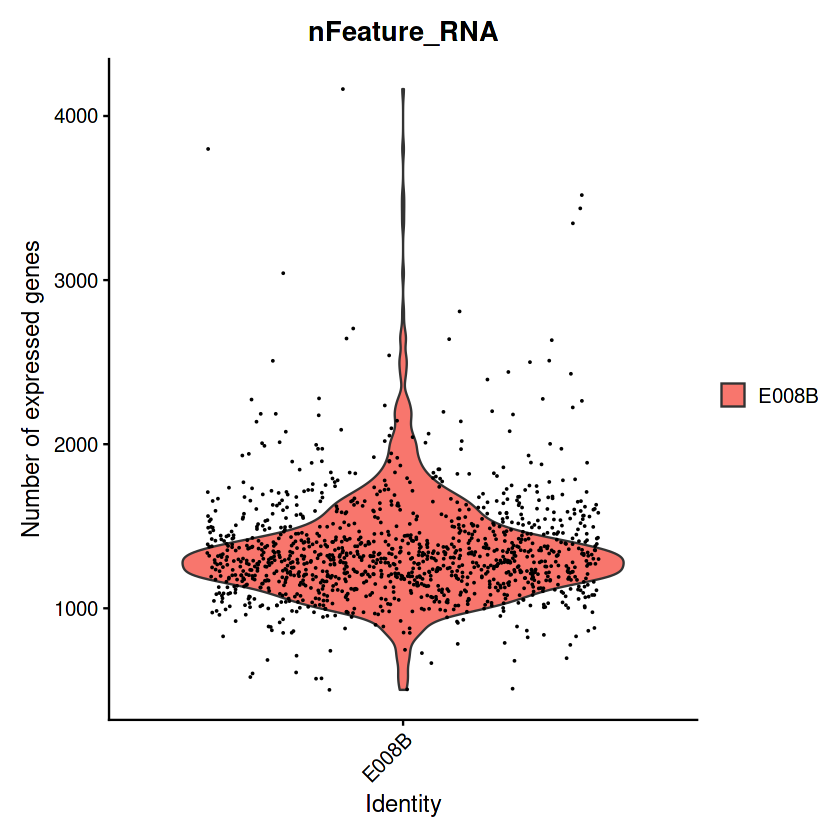

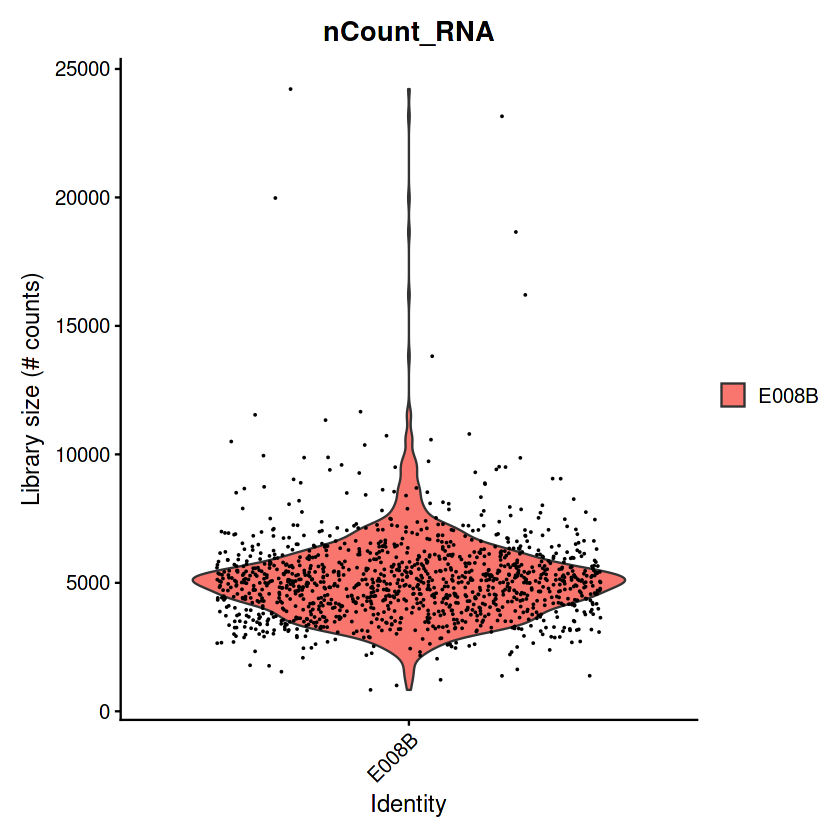

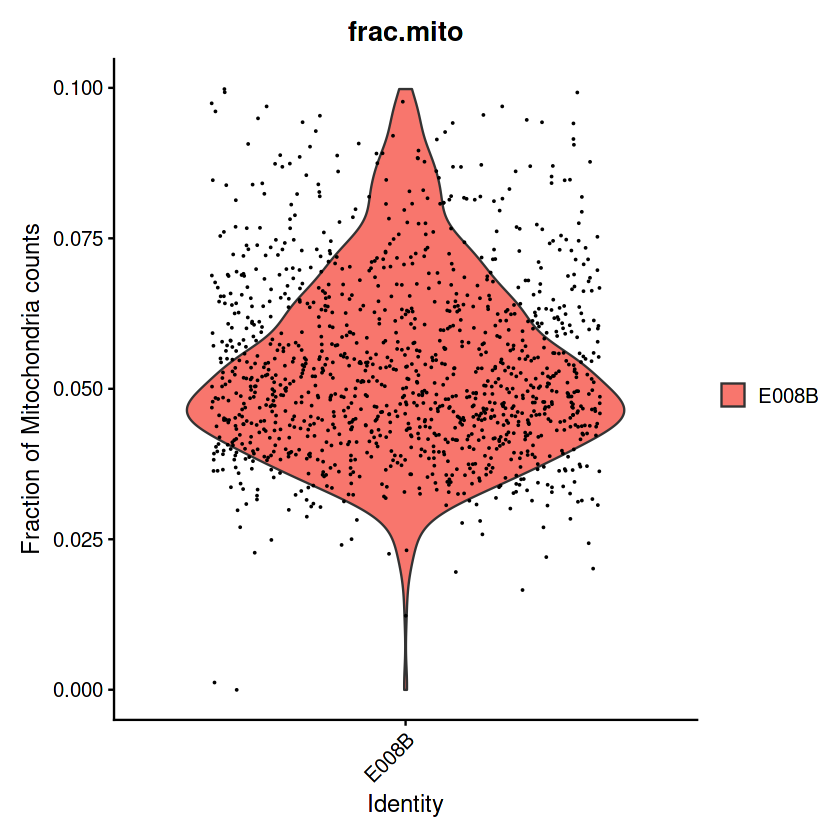

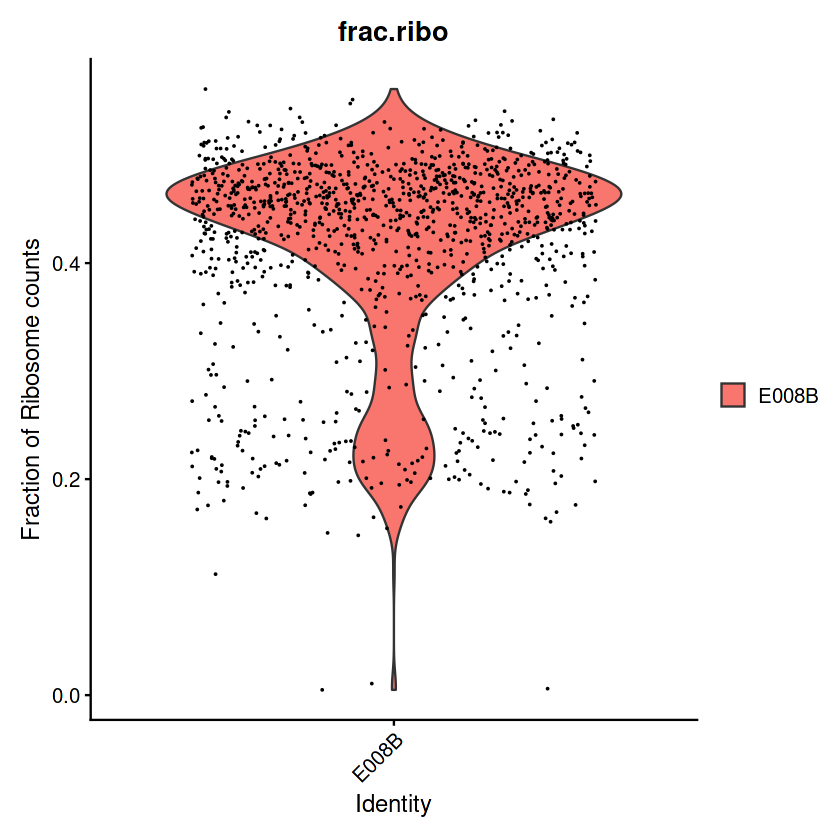

$number_of_genes

$number_of_counts

$frac.mito

$frac.ribo

$num_counts_vs_frac.mito

$num_counts_vs_num_genes


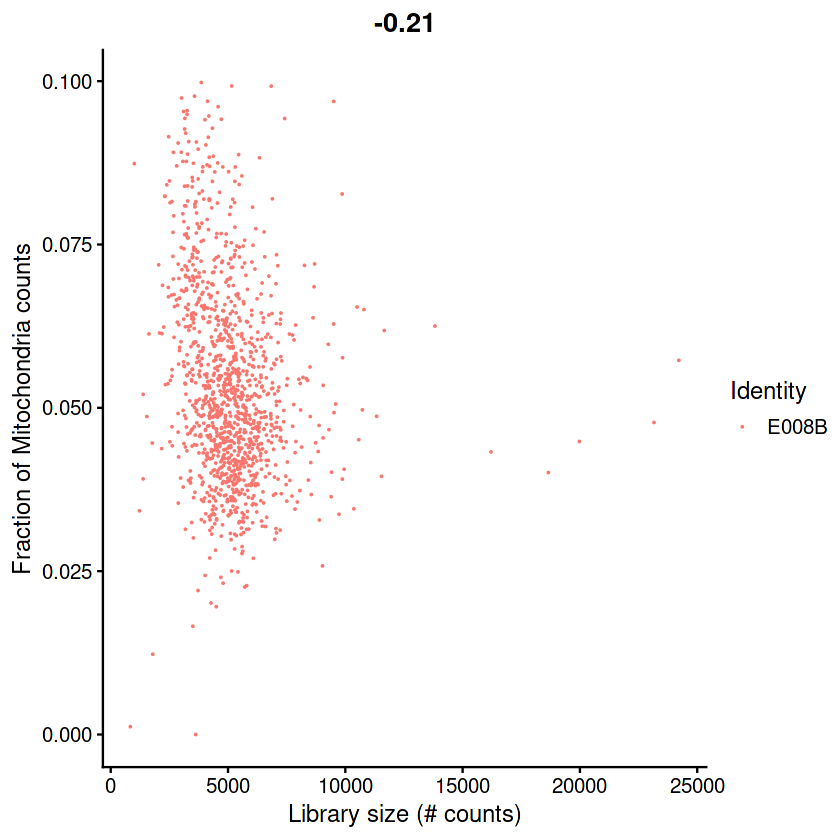

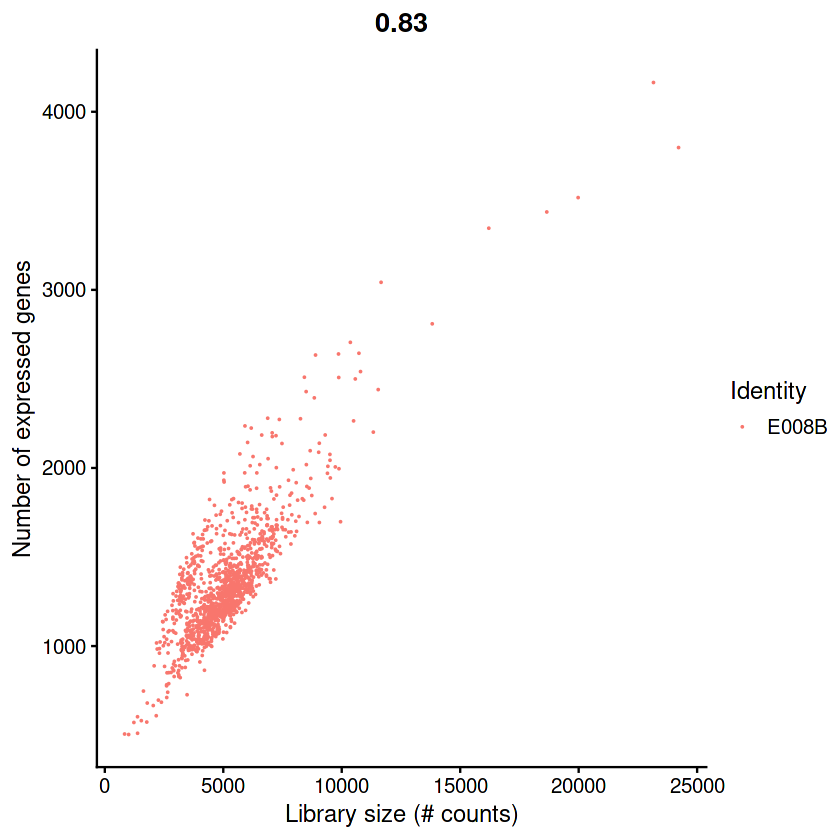

In [12]:
#qc plot after filtering
suppressWarnings(plt<-plot_mito_ribo(seu))
plt

In [13]:
seu

An object of class Seurat 
33538 features across 1247 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

In [14]:
CD3_genes<-c("CD3D","CD3E","CD3G")
CD3_count<- Matrix::colSums(GetAssayData(
    object = seu, slot = 'counts')[CD3_genes,])
head(CD3_count)
table(CD3_count)
length(CD3_count)
seu[['CD3_count']]<-CD3_count
#seu <- AddMetaData(object = seu, metadata = CD3_count, col.name = "CD3_count")
dim(seu@meta.data)

AAACGAAAGGCAGGTT-1 AAAGAACCAACCAACT-1 AAAGGATGTGGGTCAA-1 AAAGGATTCGATCCAA-1 
                 0                  0                  7                 12 
AAAGGGCAGTCATGCT-1 AAAGGGCCACTCCTTG-1 
                 8                  0

CD3_count
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
354  21  24  43 100 107 100 100 100  74  55  50  39  26  18   9   5   4   3   4 
 20  21  23  24  26  28  32  39 
  1   1   3   1   1   2   1   1 

[1] 1247

[1] 1247    7

In [15]:
save_path = file.path(save_dir, paste0(sample_ID, ".rds"))
saveRDS(seu, file = save_path)